In [1]:
import numpy as np
from scipy.signal import butter, filtfilt, firwin
import wfdb  # optional, if you want to test with PhysioNet data
import matplotlib.pyplot as plt

In [2]:
def filter_ecg(ecg_signal, fs):
    # --- 1. High-pass Butterworth filter (0.5 Hz) ---
    hp_cutoff = 0.5  # Hz
    hp_order = 2  # typical for ECG baseline correction
    b_hp, a_hp = butter(hp_order, hp_cutoff / (fs / 2), btype='high', analog=False)
    ecg_hp = filtfilt(b_hp, a_hp, ecg_signal)

    # --- 2. Low-pass FIR filter (12th order, 35 Hz at 3dB) ---
    lp_cutoff = 35  # Hz
    lp_order = 12
    fir_coeff = firwin(lp_order + 1, lp_cutoff / (fs / 2))
    ecg_filtered = filtfilt(fir_coeff, [1.0], ecg_hp)

    return ecg_filtered


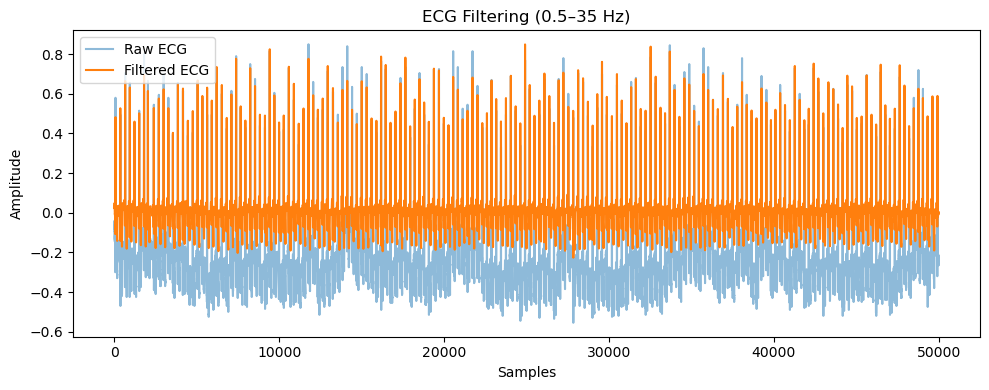

In [3]:
record = wfdb.rdrecord('100',sampto=50000, pn_dir='mitdb')
fs = record.fs
ecg = record.p_signal[:, 1]  # use second lead

filtered = filter_ecg(ecg, fs)

plt.figure(figsize=(10,4))
plt.plot(ecg, label='Raw ECG', alpha=0.5)
plt.plot(filtered, label='Filtered ECG', linewidth=1.5)
plt.legend()
plt.title("ECG Filtering (0.5–35 Hz)")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()
